# скрипт #03
<hr>

# страндарные библиотеки для работы

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from IPython.core.display import HTML

In [2]:
# sklearn packages
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [3]:
fileNames=['rawDataFull1001.csv', 'rawDataFull1003.csv', 
            'rawDataFull1004.csv', 'rawDataFull1005.csv',
            'rawDataFull1006.csv']
path='../ITC RUSAL/baths/'
bathNumber=['1001','1003','1004','1005','1006']

In [4]:
# data[0] - 1001, 1 - 1003, 2 - 1004, 3 - 1005, 4 - 1006
data=[]
for dataset in fileNames:
    data.append(pd.read_csv(path+dataset))

In [5]:
# удалить столбец "KOL4", т.к. он пустой по всех 5ти наборах
for i in range(5):
    data[i]=data[i].drop(columns=['KOL4'])

##  нормализуем в $[0,1]$

In [6]:
dataScaled=[]
for i in range(5):
    x=data[i].values
    scaler = preprocessing.MinMaxScaler()
    x_scaled = scaler.fit_transform(x)
    dataScaled.append( pd.DataFrame(x_scaled, columns=data[i].columns.values) )

## заполним пропусти средним, медианой и с помощью метода kNN: k=2,3,5

In [7]:
dataScImpMean=[]
for i in range(5):
    impMean = SimpleImputer(missing_values=np.nan, strategy='mean')
    dataScImpMean.append( pd.DataFrame(impMean.fit_transform(dataScaled[i]), columns=dataScaled[i].columns.values) )

In [8]:
dataScImpMedian=[]
for i in range(5):
    impMedian = SimpleImputer(missing_values=np.nan, strategy='median')
    dataScImpMedian.append( pd.DataFrame(impMedian.fit_transform(dataScaled[i]), columns=dataScaled[i].columns.values) )

In [9]:
dataScImpMKNN2=[]
for i in range(5):
    impKNN2 = KNNImputer(missing_values=np.nan, n_neighbors=2)
    dataScImpMKNN2.append( pd.DataFrame(impKNN2.fit_transform(dataScaled[i]), columns=dataScaled[i].columns.values) )

In [10]:
dataScImpMKNN3=[]
for i in range(5):
    impKNN3 = KNNImputer(missing_values=np.nan, n_neighbors=3)
    dataScImpMKNN3.append( pd.DataFrame(impKNN3.fit_transform(dataScaled[i]), columns=dataScaled[i].columns.values) )

In [11]:
dataScImpMKNN5=[]
for i in range(5):
    impKNN5 = KNNImputer(missing_values=np.nan, n_neighbors=5)
    dataScImpMKNN5.append( pd.DataFrame(impKNN5.fit_transform(dataScaled[i]), columns=dataScaled[i].columns.values) )

## массив 5-в-1 c пропусками и заполненный

In [12]:
data5in1=dataScaled[0].copy()
for i in range(4):
    data5in1=data5in1.append(dataScaled[i+1], ignore_index=True)
data5in1.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Columns: 31 entries, AE1 to NETOUT3
dtypes: float64(31)
memory usage: 442.1 KB


In [13]:
impMean = SimpleImputer(missing_values=np.nan, strategy='mean')
data5ni1Mean=pd.DataFrame(impMean.fit_transform(data5in1), columns=data5in1.columns.values)

In [14]:
impMedian = SimpleImputer(missing_values=np.nan, strategy='median')
data5ni1Median=pd.DataFrame(impMedian.fit_transform(data5in1), columns=data5in1.columns.values)

In [15]:
impKNN2 = KNNImputer(missing_values=np.nan, n_neighbors=2)
data5ni1KNN2=pd.DataFrame(impKNN2.fit_transform(data5in1), columns=data5in1.columns.values)

In [16]:
impKNN3 = KNNImputer(missing_values=np.nan, n_neighbors=3)
data5ni1KNN3=pd.DataFrame(impKNN3.fit_transform(data5in1), columns=data5in1.columns.values)

In [17]:
impKNN5 = KNNImputer(missing_values=np.nan, n_neighbors=5)
data5ni1KNN5=pd.DataFrame(impKNN5.fit_transform(data5in1), columns=data5in1.columns.values)

# Некоторые модели машинного обучения по данным $ X(t) \rightarrow Y(t) $

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

In [19]:
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression

In [66]:
trainImpMean=[None]*5
testImpMean=[None]*5
for i in range(5):
    trainImpMean[i], testImpMean[i] = train_test_split(dataScImpMean[i], test_size=0.25)
train5in1ImpMean, test5in1ImpMean = train_test_split(data5ni1Mean, test_size=0.25)

## линейная модель (оценка снизу)

In [72]:
# для параметра EKO
modelLinearMeanEKO=[None]*6
rmseLinearMeanEKO=[None]*6
r2scoreLinearMeanEKO=[None]*6

# для параметра ETEMP
modelLinearMeanETEMP=[None]*6
rmseLinearMeanETEMP=[None]*6
r2scoreLinearMeanETEMP=[None]*6

for i in range(5):
    
    # по параметру EKO по ваннам
    trainInputsEKO = trainImpMean[i].drop(columns=['EKO','ETEMP']).values
    testInputsEKO = testImpMean[i].drop(columns=['EKO','ETEMP']).values
    trainTargetsEKO = trainImpMean[i]['EKO'].values
    testTargetsEKO = testImpMean[i]['EKO'].values
    
    modelLinearMeanEKO[i] = LinearRegression()
    modelLinearMeanEKO[i].fit(trainInputsEKO,trainTargetsEKO)
    predictedEKO = modelLinearMeanEKO[i].predict(testInputsEKO)
    
    rmseLinearMeanEKO[i] = mean_squared_error(testTargetsEKO, predictedEKO, squared=False)
    r2scoreLinearMeanEKO[i] = r2_score(testTargetsEKO, predictedEKO)

    # по параметру ETEMP по ваннам
    trainInputsETEMP = trainImpMean[i].drop(columns=['EKO','ETEMP']).values
    testInputsETEMP = testImpMean[i].drop(columns=['EKO','ETEMP']).values
    trainTargetsETEMP = trainImpMean[i]['ETEMP'].values
    testTargetsETEMP = testImpMean[i]['ETEMP'].values
    
    modelLinearMeanETEMP[i] = LinearRegression()
    modelLinearMeanETEMP[i].fit(trainInputsETEMP,trainTargetsETEMP)
    predictedETEMP = modelLinearMeanETEMP[i].predict(testInputsETEMP)
    
    rmseLinearMeanETEMP[i] = mean_squared_error(testTargetsETEMP, predictedETEMP, squared=False)
    r2scoreLinearMeanETEMP[i] = r2_score(testTargetsETEMP, predictedETEMP)

# по параметру EKO 5-в-1
trainInputs5in1EKO = train5in1ImpMean.drop(columns=['EKO','ETEMP']).values
testInputs5in1EKO = test5in1ImpMean.drop(columns=['EKO','ETEMP']).values
trainTargets5in1EKO = train5in1ImpMean['EKO'].values
testTargets5in1EKO = test5in1ImpMean['EKO'].values

modelLinearMeanEKO[5] = LinearRegression()
modelLinearMeanEKO[5].fit(trainInputs5in1EKO, trainTargets5in1EKO)
predictedEKO = modelLinearMeanEKO[5].predict(testInputs5in1EKO)

rmseLinearMeanEKO[5] = mean_squared_error(testTargets5in1EKO, predictedEKO, squared=False)
r2scoreLinearMeanEKO[5] = r2_score(testTargets5in1EKO, predictedEKO)

# по параметру ETEMP 5-в-1
trainInputs5in1ETEMP = train5in1ImpMean.drop(columns=['EKO','ETEMP']).values
testInputs5in1ETEMP = test5in1ImpMean.drop(columns=['EKO','ETEMP']).values
trainTargets5in1ETEMP = train5in1ImpMean['ETEMP'].values
testTargets5in1ETEMP = test5in1ImpMean['ETEMP'].values

modelLinearMeanETEMP[5] = LinearRegression()
modelLinearMeanETEMP[5].fit(trainInputs5in1ETEMP, trainTargets5in1ETEMP)
predictedETEMP = modelLinearMeanETEMP[5].predict(testInputs5in1ETEMP)

rmseLinearMeanETEMP[5] = mean_squared_error(testTargets5in1ETEMP, predictedETEMP, squared=False)
r2scoreLinearMeanETEMP[5] = r2_score(testTargets5in1ETEMP, predictedETEMP)

In [73]:
print('Результаты линейной регрессии для прогноза EKO')
for i in range(6):
    if i<5:
        print( "Ванна %s: RMSE = %.6f, R2_score = %.6f" % (bathNumber[i],rmseLinearMeanEKO[i],r2scoreLinearMeanEKO[i]) )
    else:
        print( "Данные всех ванн: RMSE = %.6f, R2_score = %.6f" % (rmseLinearMeanEKO[i],r2scoreLinearMeanEKO[i]) )

print('\nРезультаты линейной регрессии для прогноза ETEMP')
for i in range(6):
    if i<5:
        print( "Ванна %s: RMSE = %.6f, R2_score = %.6f" % (bathNumber[i],rmseLinearMeanETEMP[i],r2scoreLinearMeanETEMP[i]) )
    else:
        print( "Данные всех ванн: RMSE = %.6f, R2_score = %.6f" % (rmseLinearMeanETEMP[i],r2scoreLinearMeanETEMP[i]) )

Результаты линейной регрессии для прогноза EKO
Ванна 1001: RMSE = 0.081232, R2_score = -0.127750
Ванна 1003: RMSE = 0.091124, R2_score = -0.080170
Ванна 1004: RMSE = 0.176805, R2_score = -0.414827
Ванна 1005: RMSE = 0.122955, R2_score = 0.017739
Ванна 1006: RMSE = 0.139794, R2_score = 0.097547
Данные всех ванн: RMSE = 0.114015, R2_score = 0.129961

Результаты линейной регрессии для прогноза ETEMP
Ванна 1001: RMSE = 0.123483, R2_score = 0.308910
Ванна 1003: RMSE = 0.106879, R2_score = 0.450389
Ванна 1004: RMSE = 0.164424, R2_score = -0.037963
Ванна 1005: RMSE = 0.100644, R2_score = 0.639522
Ванна 1006: RMSE = 0.131353, R2_score = 0.367765
Данные всех ванн: RMSE = 0.120281, R2_score = 0.469487


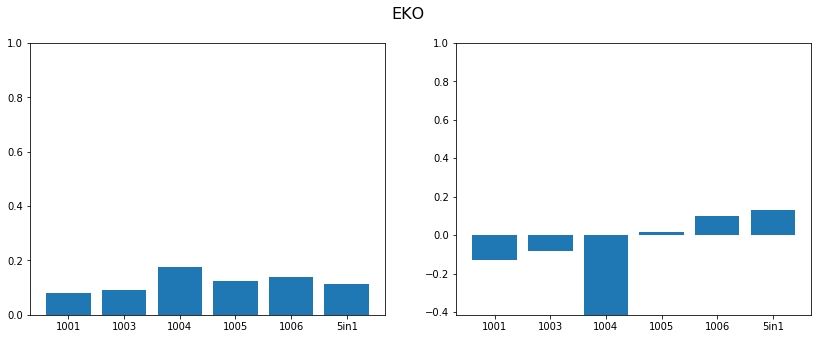

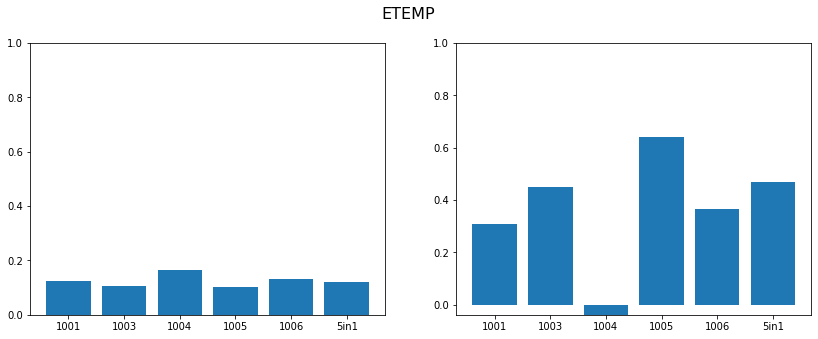

In [74]:
labelsBars=bathNumber[:]
labelsBars.append('5in1')

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
ax[0].bar([0,1,2,3,4,5],rmseLinearMeanEKO, tick_label=labelsBars)
ax[0].set_ylim(0,1)
ax[1].bar([0,1,2,3,4,5],r2scoreLinearMeanEKO, tick_label=labelsBars)
ax[1].set_ylim(np.min([0, np.min([r2scoreLinearMeanEKO])]),1)
fig.suptitle('EKO', fontsize=16)
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
ax[0].bar([0,1,2,3,4,5],rmseLinearMeanETEMP, tick_label=labelsBars)
ax[0].set_ylim(0,1)
ax[1].bar([0,1,2,3,4,5],r2scoreLinearMeanETEMP, tick_label=labelsBars)
ax[1].set_ylim(np.min([0, np.min([r2scoreLinearMeanETEMP])]) ,1)
fig.suptitle('ETEMP', fontsize=16)
plt.show()

# метод главных компонент и линейная регрессия

In [67]:
# пример 1001
i=0
trainInputsEKO = trainImpMean[i].drop(columns=['EKO','ETEMP']).values
testInputsEKO = testImpMean[i].drop(columns=['EKO','ETEMP']).values
trainTargetsEKO = trainImpMean[i]['EKO'].values
testTargetsEKO = testImpMean[i]['EKO'].values

pcaM=PCA()
newtrain=pcaM.fit_transform(trainInputsEKO)

In [68]:
print(np.array_str(pcaM.explained_variance_ratio_*100, precision=2, suppress_small=True))

[21.39 14.32 10.54  7.05  6.18  5.67  5.19  4.64  4.44  3.71  3.    2.24
  1.89  1.71  1.57  1.26  1.16  0.87  0.65  0.58  0.53  0.43  0.32  0.22
  0.16  0.13  0.11  0.06  0.  ]


In [69]:
i=0
trainInputsEKO = trainImpMean[i].drop(columns=['EKO','ETEMP']).values
testInputsEKO = testImpMean[i].drop(columns=['EKO','ETEMP']).values
trainTargetsEKO = trainImpMean[i]['EKO'].values
testTargetsEKO = testImpMean[i]['EKO'].values
trainTargetsETEMP = trainImpMean[i]['ETEMP'].values
testTargetsETEMP = testImpMean[i]['ETEMP'].values

pcaM=PCA(n_components=2)
newtrain=pcaM.fit_transform(trainInputsEKO)

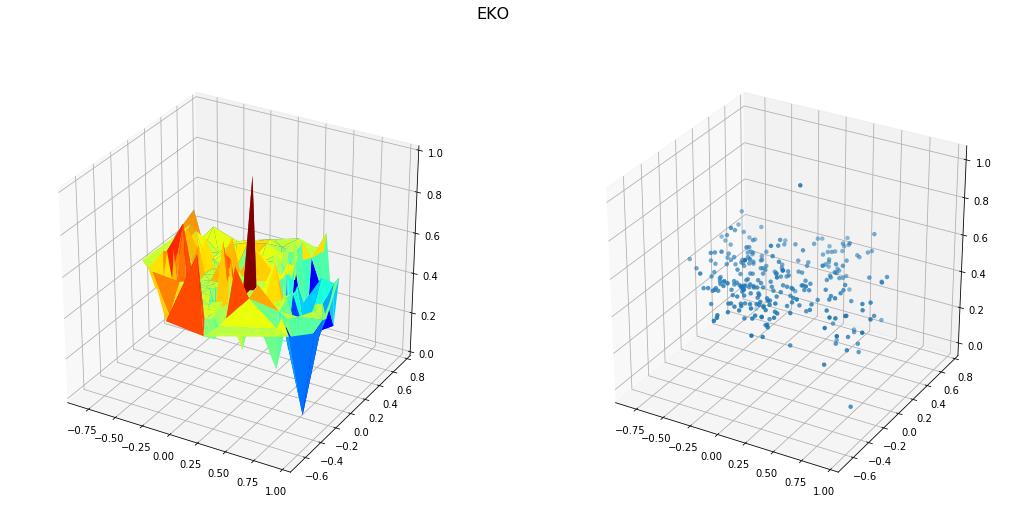

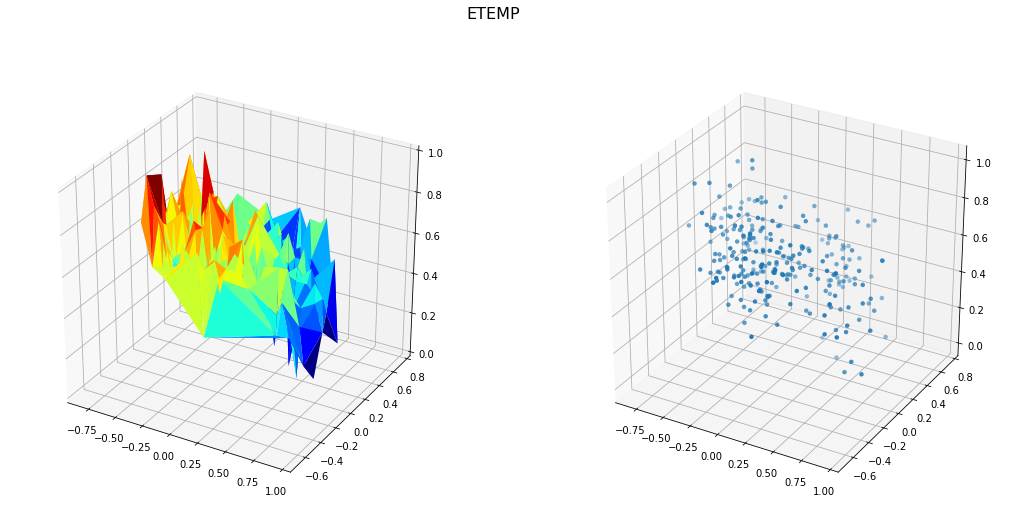

In [70]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(newtrain[:,0],newtrain[:,1],
            trainTargetsEKO, cmap=cm.jet, linewidth=0)
ax = fig.add_subplot(122, projection='3d')

ax.scatter(newtrain[:,0],newtrain[:,1],
            trainTargetsEKO, cmap=cm.jet, linewidth=0)
plt.suptitle('EKO', fontsize=16)
plt.show()

fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(newtrain[:,0],newtrain[:,1],
            trainTargetsETEMP, cmap=cm.jet, linewidth=0)
ax = fig.add_subplot(122, projection='3d')

ax.scatter(newtrain[:,0],newtrain[:,1],
            trainTargetsETEMP, cmap=cm.jet, linewidth=0)
plt.suptitle('ETEMP', fontsize=16)
plt.show()

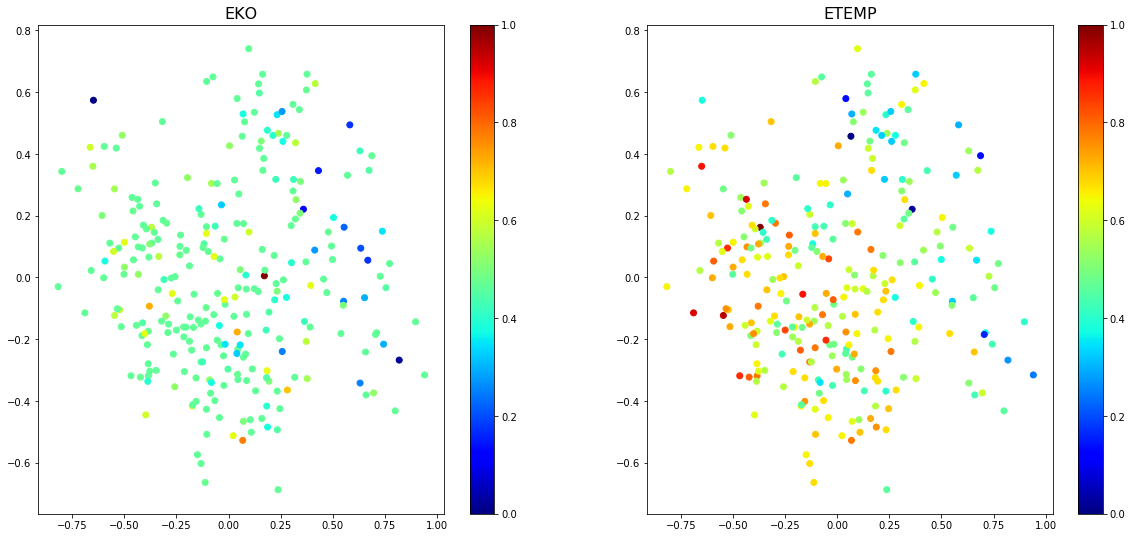

In [71]:
fig, ax = plt.subplots( figsize=(20,9), ncols=2)
ax1=ax[0].scatter(newtrain[:,0],newtrain[:,1], c=trainTargetsEKO, cmap=cm.jet)
ax2=ax[1].scatter(newtrain[:,0],newtrain[:,1], c=trainTargetsETEMP, cmap=cm.jet)
ax[0].set_title('EKO', fontsize=16)
ax[1].set_title('ETEMP', fontsize=16)
fig.colorbar(ax1, ax=ax[0])
fig.colorbar(ax2, ax=ax[1])
plt.show()

In [75]:
# пример 5-в-1
pcaM=PCA()
newtrain=pcaM.fit_transform(data5ni1Mean.drop(columns=['EKO','ETEMP']).values)

print(np.array_str(pcaM.explained_variance_ratio_*100, precision=2, suppress_small=True))

[17.65 12.76 10.44  9.01  7.41  5.97  4.83  4.08  3.33  3.14  2.84  2.4
  2.09  2.01  1.99  1.85  1.6   1.37  1.23  0.95  0.78  0.61  0.55  0.32
  0.28  0.23  0.15  0.13  0.  ]


In [76]:
# пример 5-в-1
pcaM=PCA(n_components=2)
newtrain=pcaM.fit_transform(data5ni1Mean.drop(columns=['EKO','ETEMP']).values)

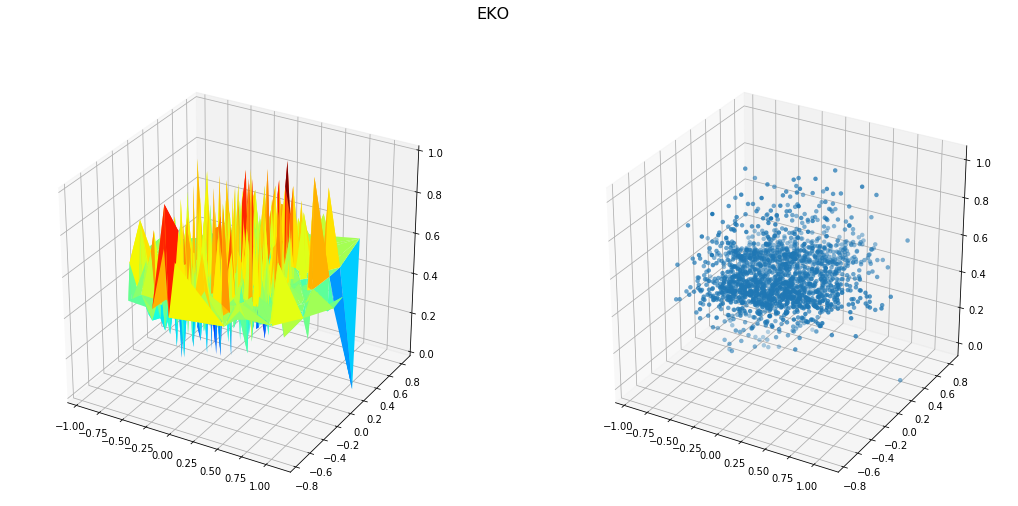

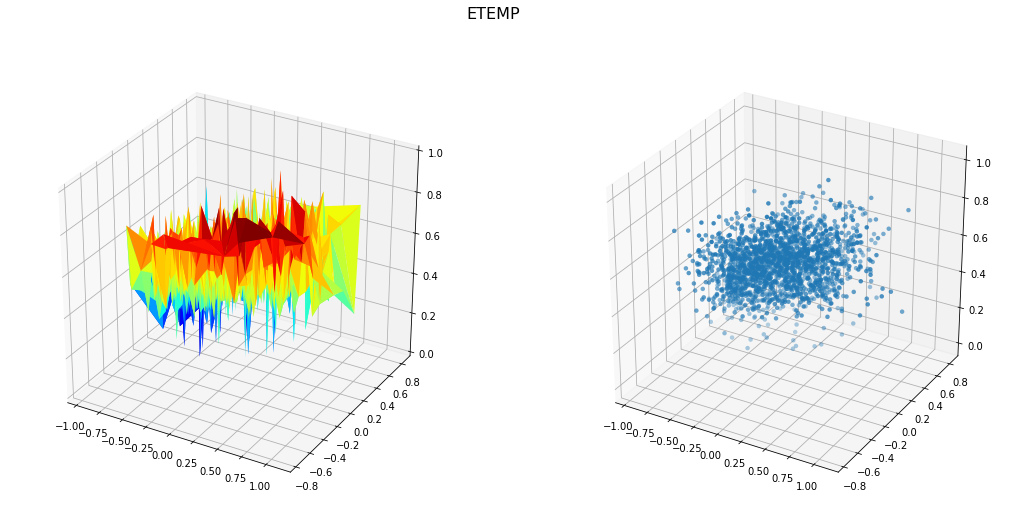

In [77]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(newtrain[:,0],newtrain[:,1],
            data5ni1Mean['EKO'].values, cmap=cm.jet, linewidth=0)
ax = fig.add_subplot(122, projection='3d')

ax.scatter(newtrain[:,0],newtrain[:,1],
            data5ni1Mean['EKO'].values, cmap=cm.jet, linewidth=0)
plt.suptitle('EKO', fontsize=16)
plt.show()

fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(newtrain[:,0],newtrain[:,1],
            data5ni1Mean['ETEMP'].values, cmap=cm.jet, linewidth=0)
ax = fig.add_subplot(122, projection='3d')

ax.scatter(newtrain[:,0],newtrain[:,1],
            data5ni1Mean['ETEMP'].values, cmap=cm.jet, linewidth=0)
plt.suptitle('ETEMP', fontsize=16)
plt.show()

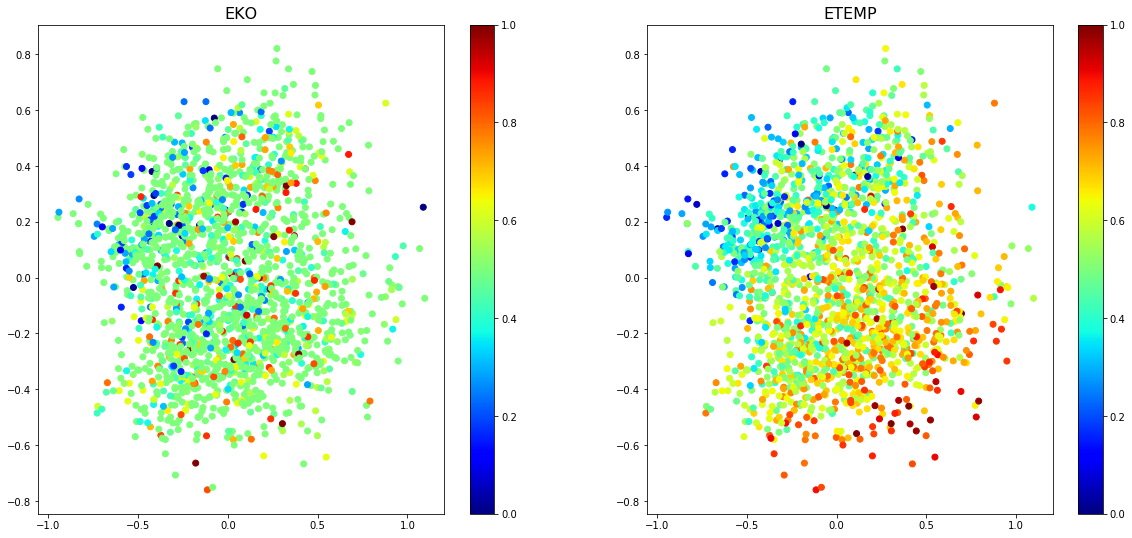

In [78]:
fig, ax = plt.subplots( figsize=(20,9), ncols=2)
ax1=ax[0].scatter(newtrain[:,0],newtrain[:,1],c=data5ni1Mean['EKO'].values, cmap=cm.jet)
ax2=ax[1].scatter(newtrain[:,0],newtrain[:,1],c=data5ni1Mean['ETEMP'].values, cmap=cm.jet)
ax[0].set_title('EKO', fontsize=16)
ax[1].set_title('ETEMP', fontsize=16)
fig.colorbar(ax1, ax=ax[0])
fig.colorbar(ax2, ax=ax[1])
plt.show()

## линейная модель

In [79]:
# PCA по всей выборки, потом деление на обучающую/тестовую
pcaDataScImpMean=[None]*5
numCompPCA=5
for i in range(5):
    pcaModel=PCA(n_components=numCompPCA)
    pcaDataScImpMean[i]=pcaModel.fit_transform(dataScImpMean[i].drop(columns=['EKO','ETEMP']))
    pcaDataScImpMean[i]=pd.DataFrame(pcaDataScImpMean[i])
    pcaDataScImpMean[i]['EKO']=dataScImpMean[i]['EKO'].copy()
    pcaDataScImpMean[i]['ETEMP']=dataScImpMean[i]['ETEMP'].copy()
pcaModel=PCA(n_components=numCompPCA)
pcaData5in1ScImpMean=pcaModel.fit_transform(data5ni1Mean.drop(columns=['EKO','ETEMP']))
pcaData5in1ScImpMean=pd.DataFrame(pcaData5in1ScImpMean)
pcaData5in1ScImpMean['EKO']=data5ni1Mean['EKO'].copy()
pcaData5in1ScImpMean['ETEMP']=data5ni1Mean['ETEMP'].copy()

In [80]:
trainPCAImpMean=[None]*5
testPCAImpMean=[None]*5
for i in range(5):
    trainPCAImpMean[i], testPCAImpMean[i] = train_test_split(pcaDataScImpMean[i], test_size=0.25)
trainPCA5in1ImpMean, testPCA5in1ImpMean = train_test_split(pcaData5in1ScImpMean, test_size=0.25)

In [81]:
modelPCALinearMeanEKO=[None]*6
modelPCALinearMeanETEMP=[None]*6
rmsePCALinearMeanEKO=[None]*6
r2scorePCALinearMeanEKO=[None]*6

for i in range(5):
    
    # по параметру EKO по ваннам
    trainInputsEKO = trainPCAImpMean[i].drop(columns=['EKO','ETEMP']).values
    testInputsEKO = testPCAImpMean[i].drop(columns=['EKO','ETEMP']).values
    trainTargetsEKO = trainPCAImpMean[i]['EKO'].values
    testTargetsEKO = testPCAImpMean[i]['EKO'].values
    
    modelPCALinearMeanEKO[i] = LinearRegression()
    modelPCALinearMeanEKO[i].fit(trainInputsEKO,trainTargetsEKO)
    predictedEKO = modelPCALinearMeanEKO[i].predict(testInputsEKO)
    
    rmsePCALinearMeanEKO[i] = mean_squared_error(testTargetsEKO, predictedEKO, squared=False)
    r2scorePCALinearMeanEKO[i] = r2_score(testTargetsEKO, predictedEKO)

# по параметру EKO 5-в-1
trainInputs5in1EKO = trainPCA5in1ImpMean.drop(columns=['EKO','ETEMP']).values
testInputs5in1EKO = testPCA5in1ImpMean.drop(columns=['EKO','ETEMP']).values
trainTargets5in1EKO = trainPCA5in1ImpMean['EKO'].values
testTargets5in1EKO = testPCA5in1ImpMean['EKO'].values

modelPCALinearMeanEKO[5] = LinearRegression()
modelPCALinearMeanEKO[5].fit(trainInputs5in1EKO, trainTargets5in1EKO)
predictedEKO = modelPCALinearMeanEKO[5].predict(testInputs5in1EKO)

rmsePCALinearMeanEKO[5] = mean_squared_error(testTargets5in1EKO, predictedEKO, squared=False)
r2scorePCALinearMeanEKO[5] = r2_score(testTargets5in1EKO, predictedEKO)

In [82]:
print('Результаты PCA(%i) + линейной регрессии' % numCompPCA)
for i in range(6):
    if i<5:
        print( "Ванна %s: RMSE = %.6f, R2_score = %.6f" % (bathNumber[i],rmsePCALinearMeanEKO[i],r2scorePCALinearMeanEKO[i]) )
    else:
        print( "Данные всех ванн: RMSE = %.6f, R2_score = %.6f" % (rmsePCALinearMeanEKO[i],r2scorePCALinearMeanEKO[i]) )

Результаты PCA(5) + линейной регрессии
Ванна 1001: RMSE = 0.100980, R2_score = -0.001097
Ванна 1003: RMSE = 0.070229, R2_score = -0.146522
Ванна 1004: RMSE = 0.144550, R2_score = 0.109559
Ванна 1005: RMSE = 0.125643, R2_score = 0.137386
Ванна 1006: RMSE = 0.122594, R2_score = 0.033667
Данные всех ванн: RMSE = 0.124928, R2_score = 0.103280


In [83]:
def gridSerchPCALinearModel(n):

    pcaDataScImpMean=[None]*5
    for i in range(5):
        pcaModel=PCA(n_components=n)
        pcaDataScImpMean[i]=pcaModel.fit_transform(dataScImpMean[i].drop(columns=['EKO','ETEMP']))
        pcaDataScImpMean[i]=pd.DataFrame(pcaDataScImpMean[i])
        pcaDataScImpMean[i]['EKO']=dataScImpMean[i]['EKO'].copy()
        pcaDataScImpMean[i]['ETEMP']=dataScImpMean[i]['ETEMP'].copy()
    pcaModel=PCA(n_components=numCompPCA)
    pcaData5in1ScImpMean=pcaModel.fit_transform(data5ni1Mean.drop(columns=['EKO','ETEMP']))
    pcaData5in1ScImpMean=pd.DataFrame(pcaData5in1ScImpMean)
    pcaData5in1ScImpMean['EKO']=data5ni1Mean['EKO'].copy()
    pcaData5in1ScImpMean['ETEMP']=data5ni1Mean['ETEMP'].copy()

    trainPCAImpMean=[None]*5
    testPCAImpMean=[None]*5
    for i in range(5):
        trainPCAImpMean[i], testPCAImpMean[i] = train_test_split(pcaDataScImpMean[i], test_size=0.25)
    trainPCA5in1ImpMean, testPCA5in1ImpMean = train_test_split(pcaData5in1ScImpMean, test_size=0.25)

    modelPCALinearMeanEKO=[None]*6
    rmsePCALinearMeanEKO=[None]*6
    r2scorePCALinearMeanEKO=[None]*6

    modelPCALinearMeanETEMP=[None]*6
    rmsePCALinearMeanETEMP=[None]*6
    r2scorePCALinearMeanETEMP=[None]*6

    for i in range(5):
        
        # по параметру EKO по ваннам
        trainInputsEKO = trainPCAImpMean[i].drop(columns=['EKO','ETEMP']).values
        testInputsEKO = testPCAImpMean[i].drop(columns=['EKO','ETEMP']).values
        trainTargetsEKO = trainPCAImpMean[i]['EKO'].values
        testTargetsEKO = testPCAImpMean[i]['EKO'].values
        
        modelPCALinearMeanEKO[i] = LinearRegression()
        modelPCALinearMeanEKO[i].fit(trainInputsEKO,trainTargetsEKO)
        predictedEKO = modelPCALinearMeanEKO[i].predict(testInputsEKO)
        
        rmsePCALinearMeanEKO[i] = mean_squared_error(testTargetsEKO, predictedEKO, squared=False)
        r2scorePCALinearMeanEKO[i] = r2_score(testTargetsEKO, predictedEKO)

        # по параметру ETEMP по ваннам
        trainInputsETEMP = trainPCAImpMean[i].drop(columns=['EKO','ETEMP']).values
        testInputsETEMP = testPCAImpMean[i].drop(columns=['EKO','ETEMP']).values
        trainTargetsETEMP = trainPCAImpMean[i]['ETEMP'].values
        testTargetsETEMP = testPCAImpMean[i]['ETEMP'].values
        
        modelPCALinearMeanETEMP[i] = LinearRegression()
        modelPCALinearMeanETEMP[i].fit(trainInputsETEMP,trainTargetsETEMP)
        predictedETEMP = modelPCALinearMeanETEMP[i].predict(testInputsETEMP)
        
        rmsePCALinearMeanETEMP[i] = mean_squared_error(testTargetsETEMP, predictedETEMP, squared=False)
        r2scorePCALinearMeanETEMP[i] = r2_score(testTargetsETEMP, predictedETEMP)

    # по параметру EKO 5-в-1
    trainInputs5in1EKO = trainPCA5in1ImpMean.drop(columns=['EKO','ETEMP']).values
    testInputs5in1EKO = testPCA5in1ImpMean.drop(columns=['EKO','ETEMP']).values
    trainTargets5in1EKO = trainPCA5in1ImpMean['EKO'].values
    testTargets5in1EKO = testPCA5in1ImpMean['EKO'].values

    modelPCALinearMeanEKO[5] = LinearRegression()
    modelPCALinearMeanEKO[5].fit(trainInputs5in1EKO, trainTargets5in1EKO)
    predictedEKO = modelPCALinearMeanEKO[5].predict(testInputs5in1EKO)

    rmsePCALinearMeanEKO[5] = mean_squared_error(testTargets5in1EKO, predictedEKO, squared=False)
    r2scorePCALinearMeanEKO[5] = r2_score(testTargets5in1EKO, predictedEKO)

    # по параметру ETEMP 5-в-1
    trainInputs5in1ETEMP = trainPCA5in1ImpMean.drop(columns=['EKO','ETEMP']).values
    testInputs5in1ETEMP = testPCA5in1ImpMean.drop(columns=['EKO','ETEMP']).values
    trainTargets5in1ETEMP = trainPCA5in1ImpMean['ETEMP'].values
    testTargets5in1ETEMP = testPCA5in1ImpMean['ETEMP'].values

    modelPCALinearMeanETEMP[5] = LinearRegression()
    modelPCALinearMeanETEMP[5].fit(trainInputs5in1ETEMP, trainTargets5in1ETEMP)
    predictedETEMP = modelPCALinearMeanETEMP[5].predict(testInputs5in1ETEMP)

    rmsePCALinearMeanETEMP[5] = mean_squared_error(testTargets5in1ETEMP, predictedETEMP, squared=False)
    r2scorePCALinearMeanETEMP[5] = r2_score(testTargets5in1ETEMP, predictedETEMP)

    return rmsePCALinearMeanEKO, r2scorePCALinearMeanEKO, rmsePCALinearMeanETEMP, r2scorePCALinearMeanETEMP 

In [84]:
maxNumCompPCA=len(dataScImpMean[0].columns)
rezEKO_MSE=[]
rezEKO_R2=[]
rezETEMP_MSE=[]
rezETEMP_R2=[]
for i in range(maxNumCompPCA-1-2):
    _mse1, _r21, _mse2, _r22 = gridSerchPCALinearModel(i+1)
    rezEKO_MSE.append(_mse1)
    rezEKO_R2.append(_r21)
    rezETEMP_MSE.append(_mse2)
    rezETEMP_R2.append(_r22)    

In [85]:
print('EKO:')
print('min MSE =',np.min(rezEKO_MSE))
print('PCA(n) n =', np.ceil(np.argmin(rezEKO_MSE)/6))
print('ETEMP:')
print('min MSE =',np.min(rezETEMP_MSE))
print('PCA(n) n =', np.ceil(np.argmin(rezEKO_MSE)/6))

EKO:
min MSE = 0.061094961890317316
PCA(n) n = 12.0
ETEMP:
min MSE = 0.09348991502031362
PCA(n) n = 12.0


In [86]:
print('EKO:')
print('min MSE =',np.max(rezEKO_R2))
print('PCA(n) n =', np.ceil(np.argmax(rezEKO_R2)/6))
print('ETEMP:')
print('min MSE =',np.max(rezETEMP_R2))
print('PCA(n) n =', np.ceil(np.argmax(rezETEMP_R2)/6))

EKO:
min MSE = 0.27241215554338194
PCA(n) n = 22.0
ETEMP:
min MSE = 0.6535813862422568
PCA(n) n = 9.0


# Модель SVR

In [87]:
modelSVRMeanEKO=[None]*6
rmseSVRMeanEKO=[None]*6
r2scoreSVRMeanEKO=[None]*6

modelSVRMeanETEMP=[None]*6
rmseSVRMeanETEMP=[None]*6
r2scoreSVRMeanETEMP=[None]*6

for i in range(5):
    
    # по параметру EKO по ваннам
    trainInputsEKO = trainImpMean[i].drop(columns=['EKO','ETEMP']).values
    testInputsEKO = testImpMean[i].drop(columns=['EKO','ETEMP']).values
    trainTargetsEKO = trainImpMean[i]['EKO'].values
    testTargetsEKO = testImpMean[i]['EKO'].values
    
    modelSVRMeanEKO[i] = SVR(C=1.0, epsilon=0.1)
    modelSVRMeanEKO[i].fit(trainInputsEKO,trainTargetsEKO)
    predictedEKO = modelSVRMeanEKO[i].predict(testInputsEKO)
    
    rmseSVRMeanEKO[i] = mean_squared_error(testTargetsEKO, predictedEKO, squared=False)
    r2scoreSVRMeanEKO[i] = r2_score(testTargetsEKO, predictedEKO)

    # по параметру ETEMP по ваннам
    trainInputsETEMP = trainImpMean[i].drop(columns=['EKO','ETEMP']).values
    testInputsETEMP= testImpMean[i].drop(columns=['EKO','ETEMP']).values
    trainTargetsETEMP = trainImpMean[i]['ETEMP'].values
    testTargetsETEMP = testImpMean[i]['ETEMP'].values
    
    modelSVRMeanETEMP[i] = SVR(C=1.0, epsilon=0.1)
    modelSVRMeanETEMP[i].fit(trainInputsETEMP,trainTargetsETEMP)
    predictedETEMP = modelSVRMeanETEMP[i].predict(testInputsETEMP)
    
    rmseSVRMeanETEMP[i] = mean_squared_error(testTargetsETEMP, predictedETEMP, squared=False)
    r2scoreSVRMeanETEMP[i] = r2_score(testTargetsETEMP, predictedETEMP)

# по параметру EKO 5-в-1
trainInputs5in1EKO = train5in1ImpMean.drop(columns=['EKO','ETEMP']).values
testInputs5in1EKO = test5in1ImpMean.drop(columns=['EKO','ETEMP']).values
trainTargets5in1EKO = train5in1ImpMean['EKO'].values
testTargets5in1EKO = test5in1ImpMean['EKO'].values

modelSVRMeanEKO[5] = SVR(C=1.0, epsilon=0.1)
modelSVRMeanEKO[5].fit(trainInputs5in1EKO, trainTargets5in1EKO)
predictedEKO = modelSVRMeanEKO[5].predict(testInputs5in1EKO)

rmseSVRMeanEKO[5] = mean_squared_error(testTargets5in1EKO, predictedEKO, squared=False)
r2scoreSVRMeanEKO[5] = r2_score(testTargets5in1EKO, predictedEKO)

# по параметру ETEMP 5-в-1
trainInputs5in1ETEMP = train5in1ImpMean.drop(columns=['EKO','ETEMP']).values
testInputs5in1ETEMP = test5in1ImpMean.drop(columns=['EKO','ETEMP']).values
trainTargets5in1ETEMP = train5in1ImpMean['ETEMP'].values
testTargets5in1ETEMP = test5in1ImpMean['ETEMP'].values

modelSVRMeanETEMP[5] = SVR(C=1.0, epsilon=0.1)
modelSVRMeanETEMP[5].fit(trainInputs5in1ETEMP, trainTargets5in1ETEMP)
predictedETEMP = modelSVRMeanETEMP[5].predict(testInputs5in1ETEMP)

rmseSVRMeanETEMP[5] = mean_squared_error(testTargets5in1ETEMP, predictedETEMP, squared=False)
r2scoreSVRMeanETEMP[5] = r2_score(testTargets5in1ETEMP, predictedETEMP)

In [88]:
print('EKO: ')
print('Результаты SVR')
for i in range(6):
    if i<5:
        print( "Ванна %s: RMSE = %.6f, R2_score = %.6f" % (bathNumber[i],rmseSVRMeanEKO[i],r2scoreSVRMeanEKO[i]) )
    else:
        print( "Данные всех ванн: RMSE = %.6f, R2_score = %.6f" % (rmseSVRMeanEKO[i],r2scoreSVRMeanEKO[i]) )

print('\nETEMP: ')
print('Результаты SVR')
for i in range(6):
    if i<5:
        print( "Ванна %s: RMSE = %.6f, R2_score = %.6f" % (bathNumber[i],rmseSVRMeanETEMP[i],r2scoreSVRMeanETEMP[i]) )
    else:
        print( "Данные всех ванн: RMSE = %.6f, R2_score = %.6f" % (rmseSVRMeanETEMP[i],r2scoreSVRMeanETEMP[i]) )        

EKO: 
Результаты SVR
Ванна 1001: RMSE = 0.092032, R2_score = -0.447576
Ванна 1003: RMSE = 0.096286, R2_score = -0.206026
Ванна 1004: RMSE = 0.128935, R2_score = 0.247592
Ванна 1005: RMSE = 0.133268, R2_score = -0.153962
Ванна 1006: RMSE = 0.145021, R2_score = 0.028803
Данные всех ванн: RMSE = 0.117879, R2_score = 0.070000

ETEMP: 
Результаты SVR
Ванна 1001: RMSE = 0.125628, R2_score = 0.284692
Ванна 1003: RMSE = 0.102943, R2_score = 0.490121
Ванна 1004: RMSE = 0.128779, R2_score = 0.363293
Ванна 1005: RMSE = 0.106477, R2_score = 0.596522
Ванна 1006: RMSE = 0.120697, R2_score = 0.466182
Данные всех ванн: RMSE = 0.117662, R2_score = 0.492334


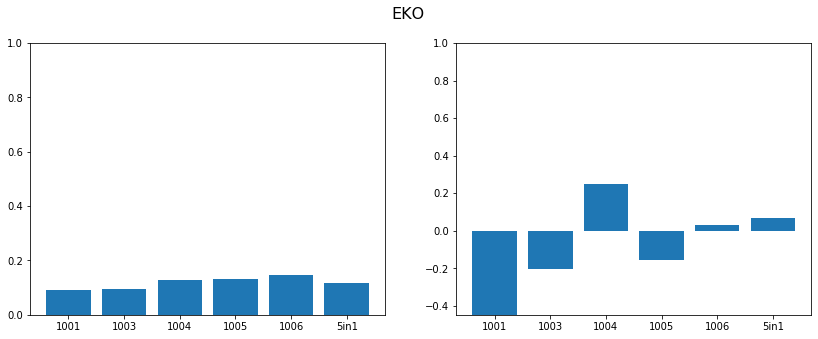

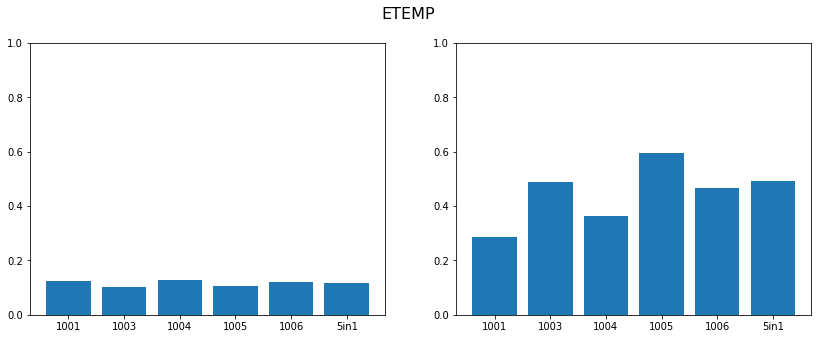

In [89]:
labelsBars=bathNumber[:]
labelsBars.append('5in1')

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
ax[0].bar([0,1,2,3,4,5],rmseSVRMeanEKO, tick_label=labelsBars)
ax[0].set_ylim(0,1)
ax[1].bar([0,1,2,3,4,5],r2scoreSVRMeanEKO, tick_label=labelsBars)
ax[1].set_ylim(np.min([0, np.min([r2scoreSVRMeanEKO])]),1)
fig.suptitle('EKO', fontsize=16)
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
ax[0].bar([0,1,2,3,4,5],rmseSVRMeanETEMP, tick_label=labelsBars)
ax[0].set_ylim(0,1)
ax[1].bar([0,1,2,3,4,5],r2scoreSVRMeanETEMP, tick_label=labelsBars)
ax[1].set_ylim(np.min([0, np.min([r2scoreSVRMeanETEMP])]) ,1)
fig.suptitle('ETEMP', fontsize=16)
plt.show()

## Модель SVR поиск гипер-парамтров по решетке

In [90]:
modelSVRMeanEKO=[None]*6
rmseSVRMeanEKO=[None]*6
r2scoreSVRMeanEKO=[None]*6

modelSVRMeanETEMP=[None]*6
rmseSVRMeanETEMP=[None]*6
r2scoreSVRMeanETEMP=[None]*6


for i in range(5):
    
    # по параметру EKO по ваннам
    trainInputsEKO = trainImpMean[i].drop(columns=['EKO','ETEMP']).values
    testInputsEKO = testImpMean[i].drop(columns=['EKO','ETEMP']).values
    trainTargetsEKO = trainImpMean[i]['EKO'].values
    testTargetsEKO = testImpMean[i]['EKO'].values
    
    parameters = {'C':[0.1, 0.5, 1, 2.5, 5, 7.5, 10], 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}
    modelSVR=SVR()
    gridSVR=GridSearchCV(modelSVR, parameters, scoring='neg_root_mean_squared_error')
    gridSVR.fit(trainInputsEKO,trainTargetsEKO)


    modelSVRMeanEKO[i] = gridSVR.best_estimator_
    modelSVRMeanEKO[i].fit(trainInputsEKO,trainTargetsEKO)
    predictedEKO = modelSVRMeanEKO[i].predict(testInputsEKO)
    
    rmseSVRMeanEKO[i] = mean_squared_error(testTargetsEKO, predictedEKO, squared=False)
    r2scoreSVRMeanEKO[i] = r2_score(testTargetsEKO, predictedEKO)

    # по параметру EKO по ваннам
    trainInputsETEMP = trainImpMean[i].drop(columns=['EKO','ETEMP']).values
    testInputsETEMP = testImpMean[i].drop(columns=['EKO','ETEMP']).values
    trainTargetsETEMP = trainImpMean[i]['ETEMP'].values
    testTargetsETEMP = testImpMean[i]['ETEMP'].values
    
    parameters = {'C':[0.1, 0.5, 1, 2.5, 5, 7.5, 10], 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}
    modelSVR=SVR()
    gridSVR=GridSearchCV(modelSVR, parameters, scoring='neg_root_mean_squared_error')
    gridSVR.fit(trainInputsETEMP,trainTargetsETEMP)


    modelSVRMeanETEMP[i] = gridSVR.best_estimator_
    modelSVRMeanETEMP[i].fit(trainInputsETEMP,trainTargetsETEMP)
    predictedETEMP = modelSVRMeanETEMP[i].predict(testInputsETEMP)
    
    rmseSVRMeanETEMP[i] = mean_squared_error(testTargetsETEMP, predictedETEMP, squared=False)
    r2scoreSVRMeanETEMP[i] = r2_score(testTargetsETEMP, predictedETEMP)

# по параметру EKO 5-в-1
trainInputs5in1EKO = train5in1ImpMean.drop(columns=['EKO','ETEMP']).values
testInputs5in1EKO = test5in1ImpMean.drop(columns=['EKO','ETEMP']).values
trainTargets5in1EKO = train5in1ImpMean['EKO'].values
testTargets5in1EKO = test5in1ImpMean['EKO'].values

parameters = {'C':[0.5, 1, 2.5, 5, 7.5, 10], 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]}
modelSVR=SVR()
gridSVR=GridSearchCV(modelSVR, parameters, scoring='neg_root_mean_squared_error')
gridSVR.fit(trainInputs5in1EKO,trainTargets5in1EKO)

modelSVRMeanEKO[5] = gridSVR.best_estimator_
modelSVRMeanEKO[5].fit(trainInputs5in1EKO, trainTargets5in1EKO)
predictedEKO = modelSVRMeanEKO[5].predict(testInputs5in1EKO)

rmseSVRMeanEKO[5] = mean_squared_error(testTargets5in1EKO, predictedEKO, squared=False)
r2scoreSVRMeanEKO[5] = r2_score(testTargets5in1EKO, predictedEKO)

# по параметру ETEMP 5-в-1
trainInputs5in1ETEMP = train5in1ImpMean.drop(columns=['EKO','ETEMP']).values
testInputs5in1ETEMP = test5in1ImpMean.drop(columns=['EKO','ETEMP']).values
trainTargets5in1ETEMP = train5in1ImpMean['ETEMP'].values
testTargets5in1ETEMP = test5in1ImpMean['ETEMP'].values

parameters = {'C':[0.5, 1, 2.5, 5, 7.5, 10], 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]}
modelSVR=SVR()
gridSVR=GridSearchCV(modelSVR, parameters, scoring='neg_root_mean_squared_error')
gridSVR.fit(trainInputs5in1ETEMP,trainTargets5in1ETEMP)

modelSVRMeanETEMP[5] = gridSVR.best_estimator_
modelSVRMeanETEMP[5].fit(trainInputs5in1ETEMP, trainTargets5in1ETEMP)
predictedETEMP = modelSVRMeanETEMP[5].predict(testInputs5in1ETEMP)

rmseSVRMeanETEMP[5] = mean_squared_error(testTargets5in1ETEMP, predictedETEMP, squared=False)
r2scoreSVRMeanETEMP[5] = r2_score(testTargets5in1ETEMP, predictedETEMP)

In [91]:
print('EKO: ')
print('Результаты SVR')
for i in range(6):
    if i<5:
        print( "Ванна %s: RMSE = %.6f, R2_score = %.6f" % (bathNumber[i],rmseSVRMeanEKO[i],r2scoreSVRMeanEKO[i]) )
    else:
        print( "Данные всех ванн: RMSE = %.6f, R2_score = %.6f" % (rmseSVRMeanEKO[i],r2scoreSVRMeanEKO[i]) )

print('\nETEMP: ')
print('Результаты SVR')
for i in range(6):
    if i<5:
        print( "Ванна %s: RMSE = %.6f, R2_score = %.6f" % (bathNumber[i],rmseSVRMeanETEMP[i],r2scoreSVRMeanETEMP[i]) )
    else:
        print( "Данные всех ванн: RMSE = %.6f, R2_score = %.6f" % (rmseSVRMeanETEMP[i],r2scoreSVRMeanETEMP[i]) )        

EKO: 
Результаты SVR
Ванна 1001: RMSE = 0.072613, R2_score = 0.098868
Ванна 1003: RMSE = 0.084141, R2_score = 0.079030
Ванна 1004: RMSE = 0.135106, R2_score = 0.173839
Ванна 1005: RMSE = 0.118128, R2_score = 0.093336
Ванна 1006: RMSE = 0.140720, R2_score = 0.085555
Данные всех ванн: RMSE = 0.113772, R2_score = 0.133670

ETEMP: 
Результаты SVR
Ванна 1001: RMSE = 0.126806, R2_score = 0.271222
Ванна 1003: RMSE = 0.105233, R2_score = 0.467183
Ванна 1004: RMSE = 0.131271, R2_score = 0.338418
Ванна 1005: RMSE = 0.102307, R2_score = 0.627508
Ванна 1006: RMSE = 0.123780, R2_score = 0.438568
Данные всех ванн: RMSE = 0.117345, R2_score = 0.495065


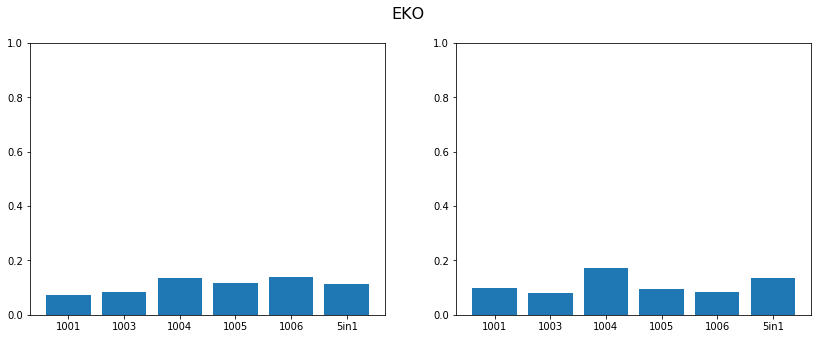

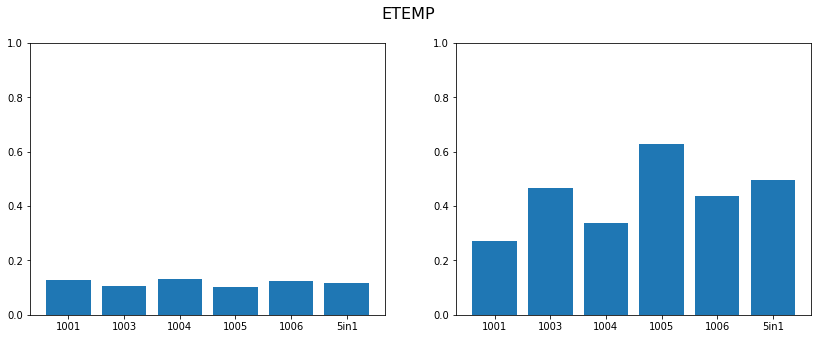

In [92]:
labelsBars=bathNumber[:]
labelsBars.append('5in1')

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
ax[0].bar([0,1,2,3,4,5],rmseSVRMeanEKO, tick_label=labelsBars)
ax[0].set_ylim(0,1)
ax[1].bar([0,1,2,3,4,5],r2scoreSVRMeanEKO, tick_label=labelsBars)
ax[1].set_ylim(np.min([0, np.min([r2scoreSVRMeanEKO])]),1)
fig.suptitle('EKO', fontsize=16)
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
ax[0].bar([0,1,2,3,4,5],rmseSVRMeanETEMP, tick_label=labelsBars)
ax[0].set_ylim(0,1)
ax[1].bar([0,1,2,3,4,5],r2scoreSVRMeanETEMP, tick_label=labelsBars)
ax[1].set_ylim(np.min([0, np.min([r2scoreSVRMeanETEMP])]) ,1)
fig.suptitle('ETEMP', fontsize=16)
plt.show()

## модель SVR по 3 параметрам c наибольшей корреляцией

In [93]:
modelSVRMeanEKO=[None]*6
rmseSVRMeanEKO=[None]*6
r2scoreSVRMeanEKO=[None]*6

modelSVRMeanETEMP=[None]*6
rmseSVRMeanETEMP=[None]*6
r2scoreSVRMeanETEMP=[None]*6

for i in range(5):
    
    # по параметру EKO по ваннам
    trainInputsEKO = trainImpMean[i][['U1','AIF3','RMPR3']].values
    testInputsEKO = testImpMean[i][['U1','AIF3','RMPR3']].values
    trainTargetsEKO = trainImpMean[i]['EKO'].values
    testTargetsEKO = testImpMean[i]['EKO'].values
    
    parameters = {'C':[0.1, 0.5, 1, 2.5, 5, 7.5, 10], 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}
    modelSVR=SVR()
    gridSVR=GridSearchCV(modelSVR, parameters, scoring='neg_root_mean_squared_error')
    gridSVR.fit(trainInputsEKO,trainTargetsEKO)


    modelSVRMeanEKO[i] = gridSVR.best_estimator_
    modelSVRMeanEKO[i].fit(trainInputsEKO,trainTargetsEKO)
    predictedEKO = modelSVRMeanEKO[i].predict(testInputsEKO)
    
    rmseSVRMeanEKO[i] = mean_squared_error(testTargetsEKO, predictedEKO, squared=False)
    r2scoreSVRMeanEKO[i] = r2_score(testTargetsEKO, predictedEKO)

    # по параметру ETEMP по ваннам
    trainInputsETEMP = trainImpMean[i][['U1','AIF3','RMPR3']].values
    testInputsETEMP = testImpMean[i][['U1','AIF3','RMPR3']].values
    trainTargetsETEMP = trainImpMean[i]['ETEMP'].values
    testTargetsETEMP = testImpMean[i]['ETEMP'].values
    
    parameters = {'C':[0.1, 0.5, 1, 2.5, 5, 7.5, 10], 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}
    modelSVR=SVR()
    gridSVR=GridSearchCV(modelSVR, parameters, scoring='neg_root_mean_squared_error')
    gridSVR.fit(trainInputsETEMP,trainTargetsETEMP)


    modelSVRMeanETEMP[i] = gridSVR.best_estimator_
    modelSVRMeanETEMP[i].fit(trainInputsETEMP,trainTargetsETEMP)
    predictedETEMP = modelSVRMeanETEMP[i].predict(testInputsETEMP)
    
    rmseSVRMeanETEMP[i] = mean_squared_error(testTargetsETEMP, predictedETEMP, squared=False)
    r2scoreSVRMeanETEMP[i] = r2_score(testTargetsETEMP, predictedETEMP)


# по параметру EKO 5-в-1
trainInputs5in1EKO = train5in1ImpMean[['U1','AIF3','RMPR3']].values
testInputs5in1EKO = test5in1ImpMean[['U1','AIF3','RMPR3']].values
trainTargets5in1EKO = train5in1ImpMean['EKO'].values
testTargets5in1EKO = test5in1ImpMean['EKO'].values

parameters = {'C':[0.5, 1, 2.5, 5, 7.5, 10], 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]}
modelSVR=SVR()
gridSVR=GridSearchCV(modelSVR, parameters, scoring='neg_root_mean_squared_error')
gridSVR.fit(trainInputs5in1EKO,trainTargets5in1EKO)

modelSVRMeanEKO[5] = gridSVR.best_estimator_
modelSVRMeanEKO[5].fit(trainInputs5in1EKO, trainTargets5in1EKO)
predictedEKO = modelSVRMeanEKO[5].predict(testInputs5in1EKO)

rmseSVRMeanEKO[5] = mean_squared_error(testTargets5in1EKO, predictedEKO, squared=False)
r2scoreSVRMeanEKO[5] = r2_score(testTargets5in1EKO, predictedEKO)

# по параметру ETEMP 5-в-1
trainInputs5in1ETEMP = train5in1ImpMean[['U1','AIF3','RMPR3']].values
testInputs5in1ETEMP = test5in1ImpMean[['U1','AIF3','RMPR3']].values
trainTargets5in1ETEMP = train5in1ImpMean['ETEMP'].values
testTargets5in1ETEMP = test5in1ImpMean['ETEMP'].values

parameters = {'C':[0.5, 1, 2.5, 5, 7.5, 10], 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]}
modelSVR=SVR()
gridSVR=GridSearchCV(modelSVR, parameters, scoring='neg_root_mean_squared_error')
gridSVR.fit(trainInputs5in1ETEMP,trainTargets5in1ETEMP)

modelSVRMeanETEMP[5] = gridSVR.best_estimator_
modelSVRMeanETEMP[5].fit(trainInputs5in1ETEMP, trainTargets5in1ETEMP)
predictedETEMP = modelSVRMeanETEMP[5].predict(testInputs5in1ETEMP)

rmseSVRMeanETEMP[5] = mean_squared_error(testTargets5in1ETEMP, predictedETEMP, squared=False)
r2scoreSVRMeanETEMP[5] = r2_score(testTargets5in1ETEMP, predictedETEMP)

In [94]:
print('EKO: ')
print('Результаты SVR')
for i in range(6):
    if i<5:
        print( "Ванна %s: RMSE = %.6f, R2_score = %.6f" % (bathNumber[i],rmseSVRMeanEKO[i],r2scoreSVRMeanEKO[i]) )
    else:
        print( "Данные всех ванн: RMSE = %.6f, R2_score = %.6f" % (rmseSVRMeanEKO[i],r2scoreSVRMeanEKO[i]) )

print('\nETEMP: ')
print('Результаты SVR')
for i in range(6):
    if i<5:
        print( "Ванна %s: RMSE = %.6f, R2_score = %.6f" % (bathNumber[i],rmseSVRMeanETEMP[i],r2scoreSVRMeanETEMP[i]) )
    else:
        print( "Данные всех ванн: RMSE = %.6f, R2_score = %.6f" % (rmseSVRMeanETEMP[i],r2scoreSVRMeanETEMP[i]) )        

EKO: 
Результаты SVR
Ванна 1001: RMSE = 0.076470, R2_score = 0.000584
Ванна 1003: RMSE = 0.082744, R2_score = 0.109360
Ванна 1004: RMSE = 0.144997, R2_score = 0.048456
Ванна 1005: RMSE = 0.117244, R2_score = 0.106865
Ванна 1006: RMSE = 0.146782, R2_score = 0.005076
Данные всех ванн: RMSE = 0.120572, R2_score = 0.027020

ETEMP: 
Результаты SVR
Ванна 1001: RMSE = 0.145686, R2_score = 0.038048
Ванна 1003: RMSE = 0.101620, R2_score = 0.503145
Ванна 1004: RMSE = 0.127681, R2_score = 0.374105
Ванна 1005: RMSE = 0.106727, R2_score = 0.594624
Ванна 1006: RMSE = 0.135545, R2_score = 0.326765
Данные всех ванн: RMSE = 0.125768, R2_score = 0.419979


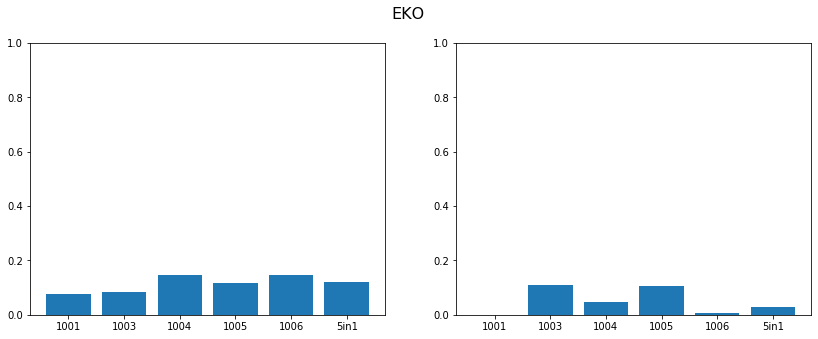

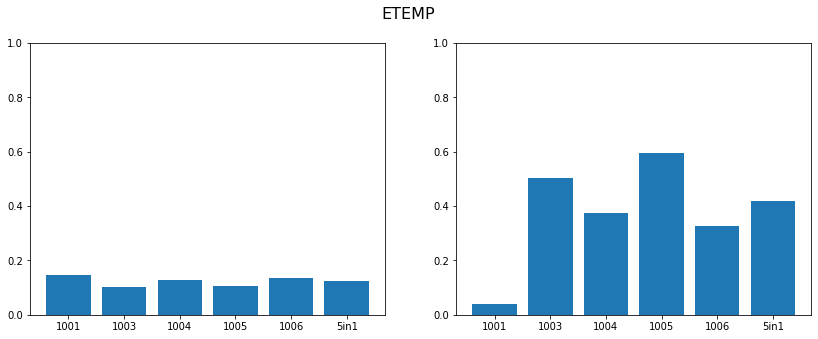

In [95]:
labelsBars=bathNumber[:]
labelsBars.append('5in1')

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
ax[0].bar([0,1,2,3,4,5],rmseSVRMeanEKO, tick_label=labelsBars)
ax[0].set_ylim(0,1)
ax[1].bar([0,1,2,3,4,5],r2scoreSVRMeanEKO, tick_label=labelsBars)
ax[1].set_ylim(np.min([0, np.min([r2scoreSVRMeanEKO])]),1)
fig.suptitle('EKO', fontsize=16)
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
ax[0].bar([0,1,2,3,4,5],rmseSVRMeanETEMP, tick_label=labelsBars)
ax[0].set_ylim(0,1)
ax[1].bar([0,1,2,3,4,5],r2scoreSVRMeanETEMP, tick_label=labelsBars)
ax[1].set_ylim(np.min([0, np.min([r2scoreSVRMeanETEMP])]) ,1)
fig.suptitle('ETEMP', fontsize=16)
plt.show()